<a href="https://colab.research.google.com/github/saquibherman/PyTorch_Deep_Learning/blob/main/ANN/ANN_codeChallenge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tasks


1.   Write a function that builds and train the model, and outputs the final predictions and losses.
2.   Write a function that creates the data and outputs x,y. x is the same as in the other file. y = m*x +randn/2. N=50.
3. In a parametric experiment, vary the slope from -2 to +2 in 21 steps. Repeat the entire experiment 50 times.
4. Plot the loss and accuracy (correlation ŷ,y) as a function of the slope.



In [ ]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
def buildAndTrain(x,y):
  # build the model
  ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )
  
  # learning rate
  learningRate = .05

  # loss function
  lossfun = nn.MSELoss()

  # optimizer (the flavor of gradient descent to implement)
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)    
  
  # train the model
  numepochs = 500
  losses = torch.zeros(numepochs)


  ## Train the model!
  for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # manually compute losses
  # final forward pass
  predictions = ANNreg(x)

  return predictions,losses

In [ ]:
def createData(m):
  N = 50
  x = torch.randn(N,1)
  y = m * x + torch.randn(N,1)/2
  return x,y

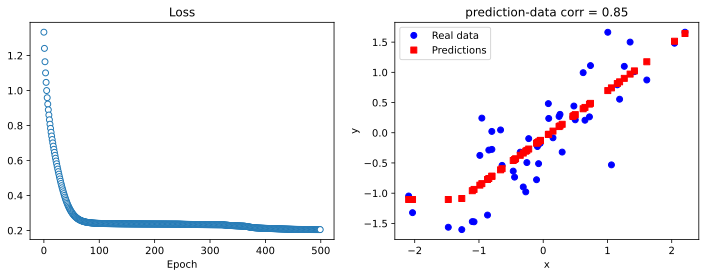

In [ ]:
# create a dataset
x,y = createData(.8)

# run the model
yHat,losses = buildAndTrain(x,y)

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat.detach(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [ ]:
# (takes 3 mins with 21 slopes and 50 exps)

# the slopes to simulate
slopes = np.linspace(-2,2,21)

numExps = 50

# initialize output matrix
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):

  for N in range(numExps):
  
    # create a dataset and run the model
    x,y = createData(slopes[slopei])
    yHat,losses = buildAndTrain(x,y)

    # store the final loss and performance
    results[slopei,N,0] = losses[-1]
    results[slopei,N,1] = np.corrcoef(y.T,yHat.detach().T)[0,1]


# correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


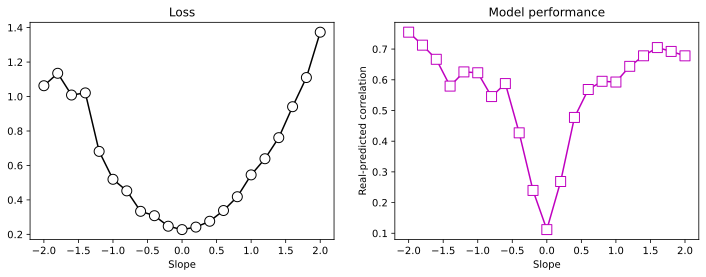

In [ ]:
# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()